# Ajuste de curvas

* Regressão linear por mínimos quadrados

# Motivação

Nesta seção veremos problemas onde queremos **prever** um valor numérico a partir de observações feitas previamente.
Este problema é conhecido como **estimação** ou também **regressão**.

Neste tipo de problema uma *variável independente ou preditora* é utilizada para prever o valor de uma *variável alvo ou dependente*.

Por exemplo, suponha que você ache que exista uma relação entre a temperatura e a quantidade de sorvetes vendidos.

A temperatura poderia ser utilizada como variável preditora para estimar o valor de vendas de sorvete (variável alvo), como no exemplo abaixo:

Dados de venda de sorvete (valores fictícios):

| Dia | Temperatura (ºC) | Vendas |
| --- | --- | --- |
| 1 | 20 | 50 |
| 2 | 22 | 53 |
| 3 | 21 | 51 |
| 4 | 18 | 42 |
| 5 | 17 | 38 |
| 6 | 20 | 51 |
| 7 | 22 | 55 |
| 8 | 24 | 63 |
| 9 | 26 | 67 |
| 10 | 27 | 72 |
| 11 | 28 | 80 |
| 12 | 29 | 85 |

Observando o gráfico dos dados da tabela anterior, podemos ver que existe uma relação *linear* entre a variável independente e a variável dependente.

![grafico](figuras/sorvete.png)

Ou seja, o nosso modelo poderia ser bem descrito pela função:

$
y = \theta_1 x + \theta_0 
$

onde $\theta_1$ e $\theta_0$ são os parâmetros do modelo, $y$ a variável alvo (vendas de sorvete) e $x$ a variável preditora (temperatura).

Este tipo de problema é chamado de **regressão linear**.

No gráfico abaixo vemos como uma reta com valores $\theta_1 = 3.66$ e $\theta_0 = -24,72$ explica bem os pontos observados:

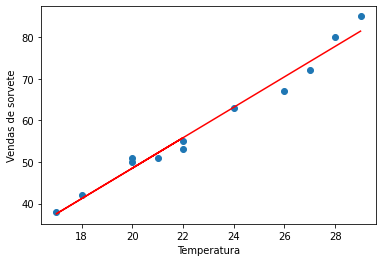

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dias = [1,2,3,4,5,6,7,8,9,10,11,12]
temperaturas = np.array([20,22,21,18,17,20,22,24,26,27,28,29])
vendas = np.array([50,53,51,42,38,51,55,63,67,72,80,85])

theta1,theta0 = 3.66, -24.72

plt.scatter(temperaturas, vendas)
plt.xlabel('Temperatura')
plt.ylabel('Vendas de sorvete')
plt.plot(temperaturas, theta1*temperaturas + theta0, 'r')

## Prevendo novos valores

Com base no modelo acima ($y = \theta_1 x + \theta_0$) que relaciona a temperatura (variável $x$) com a quantidade de vendas (variável $y$), podemos estimar o valor de vendas para uma nova temperatura, para o qual não temos o valor.

In [6]:
# Podemos usar nosso modelo para prever as vendas em um ponto não tabelado:
T = 30
V = theta1*T + theta0
print(f'As vendas estimadas para uma temperatura de {T}ºC é de {V:.0f} sorvetes')

As vendas estimadas para uma temperatura de 30ºC é de 85 sorvetes


Assim, a regressão linear para o problema acima é dado por:

$
y = 3,66x -24,72
$

onde $x$ corresponde à temperatura e $y$ a estimativa de vendas de sorvete.

Veremos a seguir como calcular os valores de $\theta_0$ e $\theta_1$ que melhor explicam os dados.

# Exemplo

Suponha que tenha sido feito uma pesquisa fictícia relacionando o consumo metabólico de um animal com a sua massa.
Os dados obtidos estão representados na tabela abaixo:

| Animal | Massa (kg) | Consumo metabólico (W) |
| --- | --- | --- |
| Vaca | 400 | 470 |
| Cavalo | 300 | 400 |
| Javali | 100 | 120 |
| Humano | 70 | 72 |
| Ovelha | 45 | 50 |
| Galinha | 2 | 4,8 |
| Rato | 0,3 | 1,45 |
| Pombo | 0,16 | 0,97 |

Os dados acima podem ser melhor visualizados no gráfico abaixo:

![consumo](./figuras/ajuste-curvas-consumometabolico.png)

Com base nos dados acima, qual seria uma **estimativa** para o consumo de um tigre de 200kg?

Inicialmente, observamos pelo gráfico que o consumo varia **linearmente** com a massa.
Assim, podemos **aproximar** o modelo por uma reta:

$
y = \theta_1x + \theta_0
$

onde $y$ é o consumo metabólico e $x$ a massa.
Dadas as características do problema, podemos supor também que $\theta_0 = 0$.

## Estimando os parâmetros do modelo usando apenas 1 dado

Nosso modelo simplificado se torna então:

$y  = \theta_1 x$.

A princípio, basta utilizar os dados de uma única observação para obtermos o valor de $\theta_1$.
Se utilizarmos os dados para vaca, teremos:

$\theta_1 = \dfrac{\Delta y}{\Delta x} = \dfrac{470}{400} = 1,175$

Assim, para uma massa $m = 200$, teremos:

$y = 1,175\cdot 200 = 235,0$.

Porém, se utilizamos os dados para cavalo, o valor obtido será:

$\theta_1 = \dfrac{\Delta y}{\Delta x} = \dfrac{400}{300} = 1,333$

$y = 1,333\cdot 200 = 266,667
$

<div class="alert alert-block alert-warning">
Qual seria um bom critério para definir os parâmetros do nosso modelo?</div>

Uma forma melhor seria estimar o valor de $\theta_1$ utilizando **todos** os dados disponíveis, **minimizando** alguma métrica de **erro**:

* Método dos mínimos quadrados.

## Resíduo

Considere um modelo $y(x) = \theta_1x$ que estima o valor de consumo metabólico.

Vamos chamar a diferença entre o valor estimado e o valor medido de **erro** ou **resíduo**:

$
e_i = y_i - y(x_i)
$

Para o exemplo anterior, teremos que o resíduo utilizando os dados da vaca será igual a:

In [1]:
lista1 = ['a', 'b', 'c']
lista2 = [2, 4, 6]
z = zip(lista1, lista2)
for a,b in z:
    print(a,b)

a 2
b 4
c 6


In [13]:
consumo = np.array([470, 400, 120, 72, 50, 4.8, 1.45, 0.97])
massa = np.array([400, 300, 100, 70, 45, 2, 0.3, 0.16])
animal = ['Vaca', 'Cavalo', 'Javali', 'Homem', 'Ovelha', 'Galinha', 'Rato', 'Pombo']

theta1 = 470/400

for an,c,m in zip(animal, consumo, massa):
    e = c - theta1*m
    print(f'Resíduo para {an} = {e:.2f}')

Resíduo para Vaca = 0.00
Resíduo para Cavalo = 47.50
Resíduo para Javali = 2.50
Resíduo para Homem = -10.25
Resíduo para Ovelha = -2.88
Resíduo para Galinha = 2.45
Resíduo para Rato = 1.10
Resíduo para Pombo = 0.78


Um critério muito utilizado para determinar o valor do parâmetro $\theta_1$ é encontrar o valor de $\theta_1$ que minimiza a soma do **quadrado do resíduo**:

(Pare e pense: Por que minimizar a soma do **quadrado** do resíduo é melhor que minimizar a soma do resíduo?)

In [4]:
consumo = np.array([470, 400, 120, 72, 50, 4.8, 1.45, 0.97])
massa = np.array([400, 300, 100, 70, 45, 2, 0.3, 0.16])
animal = ['Vaca', 'Cavalo', 'Javali', 'Homem', 'Ovelha', 'Galinha', 'Rato', 'Pombo']

theta1 = 470/400

residuo = consumo - theta1*massa
print(residuo)

soma = np.sum((residuo**2))
print(soma)

[  0.      47.5      2.5    -10.25    -2.875    2.45     1.0975   0.782 ]
2383.64665525


## Gráfico do resíduo vs $\theta_1$

Vamos variar o valor de $\theta_1$ e determinar a soma do quadrado do resíduo para cada valor de $\theta_1$:

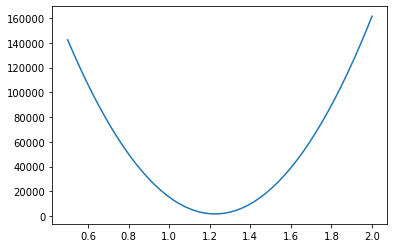

In [5]:
consumo = np.array([470, 400, 120, 72, 50, 4.8, 1.45, 0.97])
massa = np.array([400, 300, 100, 70, 45, 2, 0.3, 0.16])
animal = ['Vaca', 'Cavalo', 'Javali', 'Homem', 'Ovelha', 'Galinha', 'Rato', 'Pombo']

THETA = np.linspace(0.5,2)
S = []
for th1 in THETA:
    residuo = consumo - th1*massa
    soma = np.sum((residuo**2))
    S.append(soma)
    
plt.plot(THETA, S)

Observe que o valor que minimiza a soma dos resíduos encontra-se próximo de 1,2.
Existem várias formas de determinar este valor:

## Método 1: Utilizando uma função pronta

É possível determinar os parâmetros utilizando funções de bibliotecas tradicionais.

Uma delas é a função `lstsq` da biblioteca `numpy`.
Nesta função, ela determina a solução que melhor se aproxima da solução do sistema:

$y = Ax$

minimizando o erro dado por $\lVert y - Ax  \rVert $

In [33]:
import numpy as np

# y = consumo
consumo = np.array([470, 400, 120, 72, 50, 4.8, 1.45, 0.97])
# A = massa
# neste caso, A deve ser um vetor coluna
massa = np.array([400, 300, 100, 70, 45, 2, 0.3, 0.16]).reshape(-1,1)
# x = theta1

resposta = np.linalg.lstsq(massa, consumo, rcond=None)
th1 = resposta[0]
print(resposta, '\ntheta1 =', th1)
print(f'\nA equação do modelo é a reta: y = {th1[0]:.3f}x')

(array([1.22616894]), array([1684.75677101]), 1, array([516.65183209])) 
theta1 = [1.22616894]

A equação do modelo é a reta: y = 1.226x


### Método 3b:

Outra opção é a função `linregress` do pacote `scipy`.
Neste caso o ajuste é feito usando a função $y = \theta_1x + \theta_0$

In [32]:
from scipy import stats

consumo = np.array([470, 400, 120, 72, 50, 4.8, 1.45, 0.97])
massa = np.array([400, 300, 100, 70, 45, 2, 0.3, 0.16])

X = massa
Y = consumo

res = stats.linregress(X, Y)
print(res)
th1,th0 = res.slope, res.intercept
print(f'\nA equação do modelo é a reta: y = {th1:.3f}x + {th0:.3f}')

LinregressResult(slope=1.2302402800853454, intercept=-1.1845309208876245, rvalue=0.9965896331464744, pvalue=9.890808956322722e-08, stderr=0.041585593811254734, intercept_stderr=7.596191198662999)

A equação do modelo é a reta: y = 1.230x + -1.185


## Método 2: Otimização

Podemos usar os métodos de minimização visto em aula para achar o melhor valor de $\theta_1$:

In [28]:
import scipy.optimize as opt

consumo = np.array([470, 400, 120, 72, 50, 4.8, 1.45, 0.97])
massa = np.array([400, 300, 100, 70, 45, 2, 0.3, 0.16])

def f(theta1):
    residuo = consumo - theta1*massa
    soma = np.sum((residuo**2))
    return soma
    
res = opt.minimize_scalar(f, bracket=(1,1.4))
print(res)
th1 = res.x

print(f'A equação do modelo é a reta: y = {th1:.3f}x')

massa_tigre = 200
consumo_tigre = th1 * massa_tigre
print(f'O consumo metabólico estimado para o tigre é de {consumo_tigre:.3f}')


     fun: 1684.7567710146986
    nfev: 9
     nit: 5
 success: True
       x: 1.226168938012995
A equação do modelo é a reta: y = 1.226x
O consumo metabólico estimado para o tigre é de 245.234


## Método 3: Solução analítica

Entretanto, neste caso podemos resolver analiticamente o problema:

$f(x) = \sum\limits_{i=1}^N e_i^2$

$f(x) = \sum\limits_{i=1}^N (y_i - \theta_1x_i)^2$

Derivando em relação à variável $\theta_1$ obtemos:

$f'(x) = \sum\limits_{i=1}^N 2(y_i - \theta_1x_i)(-x_i)$

Igualando a zero e simplificando temos:

$\sum\limits_{i=1}^N (y_i - \theta_1x_i)(x_i) = 0$

Expandindo as somatórias temos:

$\sum\limits_{i=1}^N y_i x_i - \sum\limits_{i=1}^N \theta_1 x_i^2 = 0$

O que nos leva à fórmula:

$\theta_1 = \dfrac{\sum\limits_{i=1}^N y_i  x_i}{\sum\limits_{i=1}^N x_i^2}$

In [29]:
consumo = np.array([470, 400, 120, 72, 50, 4.8, 1.45, 0.97])
massa = np.array([400, 300, 100, 70, 45, 2, 0.3, 0.16])

X = massa
Y = consumo

theta1 = np.sum(X*Y) / np.sum(X**2)
print(f'A equação do modelo é a reta: y = {theta1:.3f}x')

A equação do modelo é a reta: y = 1.226x


### Biblioteca statsmodels:

Também é possível utilizar a biblioteca `statsmodels.api`.
Neste caso é possível ajustar os pontos tanto para uma reta do tipo $y = \theta_1x$ quanto para uma reta do tipo $y = \theta_1x + \theta_0$

In [35]:
import statsmodels.api as sm

modelo = sm.OLS(Y, X).fit()
print(modelo.summary())
th1 = modelo.params[0]
print(f'\nA equação do modelo é a reta: y = {th1:.3f}x')

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              1667.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):                    1.38e-09
Time:                        20:46:46   Log-Likelihood:                         -32.751
No. Observations:                   8   AIC:                                      67.50
Df Residuals:                       7   BIC:                                      67.58
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

d:\system\conda_envs\cn\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Exemplo 2

Considere os dados sobre o tabagismo no Brasil entre adultos no período de 2006 à 2021:

![tabagismo](./figuras/ajuste-curvas-tabagismo.png)

Fonte: Vigitel Brasil 2006 a 2021: Vigilância de Fatores de Risco e Proteção para Doenças Crônicas por Inquérito Telefônico. (https://www.inca.gov.br/observatorio-da-politica-nacional-de-controle-do-tabaco/dados-e-numeros-prevalencia-tabagismo)

Com base nos dados acima, faça uma estimativa da percentagem de fumantes na população brasileira em 2025.

Neste caso a variável independente é o ano e a variável alvo a porcentagem de fumantes.

Text(0, 0.5, 'Fumantes (%)')

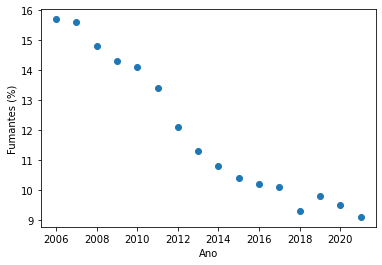

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

ano = np.array([2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,
        2017,2018,2019,2020,2021])
fumantes = np.array([15.7,15.6,14.8,14.3,14.1,13.4,12.1, 
                     11.3,10.8,10.4,10.2,10.1,9.3,9.8,9.5,9.1])

plt.scatter(ano, fumantes)
plt.xlabel('Ano')
plt.ylabel('Fumantes (%)')

## Método 1: Utilizando funções do python

A função `lstsq` do pacote `numpy` pode ser utilizada para determinar o valores de $\theta_1$ e $\theta_0$ que minimizam o resíduo.

Para utilizar esta função, devemos transformá-lo no formato $Y = A\pmb{\theta}$, onde:

* $Y$ é um vetor contendo os dados da variável alvo, neste caso o percentual de fumantes
* $\pmb\theta$ é um vetor contendo os parâmetros a serem estimados ($\pmb\theta = [ \theta_1, \theta_0]$)
* $A$ é a matriz que contem o modelo e os valores da variável $x$ (ano)

Para o modelo de uma reta do tipo $y = \theta_1 x + \theta_0$ o modelo para a matriz $A$ é:

$A =
\begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
\vdots \\
x_n & 1
\end{bmatrix}
$

Assim, teremos o seguinte sistema:

\begin{equation}
\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} = 
\begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
\vdots \\
x_n & 1
\end{bmatrix}
\begin{bmatrix} \theta_1 \\ \theta_0 \end{bmatrix}
\end{equation}

onde $x_i$ e $y_i$ correspondem à i-ésima amostra.


A equação do modelo é a reta: y = -0.482x + 982.828
A percentagem estimada de fumantes em 2025 é de 6.360882352941189


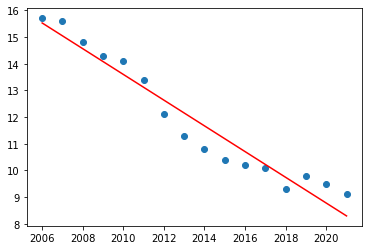

In [21]:
X = np.array([2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,
        2017,2018,2019,2020,2021])
Y = np.array([15.7,15.6,14.8,14.3,14.1,13.4,12.1, 
                     11.3,10.8,10.4,10.2,10.1,9.3,9.8,9.5,9.1])

A = np.vstack([X, np.ones(len(X))]).T
th1, th0 = np.linalg.lstsq(A, Y, rcond=None)[0]

plt.scatter(X, Y)
plt.plot(X, X*th1 + th0, 'r')

print(f'\nA equação do modelo é a reta: y = {th1:.3f}x + {th0:.3f}')

fumantes_em_2025 = th1*2025 + th0
print('A percentagem estimada de fumantes em 2025 é de', fumantes_em_2025)

## Método 1b: Utilizando funções do python (scipy.stats.linregress)

In [22]:
from scipy import stats

X = np.array([2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,
        2017,2018,2019,2020,2021])
Y = np.array([15.7,15.6,14.8,14.3,14.1,13.4,12.1, 
                     11.3,10.8,10.4,10.2,10.1,9.3,9.8,9.5,9.1])

r = stats.linregress(X, Y)
th1,th0 = r.slope, r.intercept

print(f'A equação do modelo é a reta: y = {th1:.3f}x + {th0:.3f}')

fumantes_em_2025 = th1*2025 + th0
print('A percentagem estimada de fumantes em 2025 é de', fumantes_em_2025)

A equação do modelo é a reta: y = -0.482x + 982.828
A percentagem estimada de fumantes em 2025 é de 6.360882352941189


## Método 2: Otimização

O modelo que vamos ajustar é uma função do tipo $y = \theta_1x + \theta_0$, onde $y$ é o número de fumantes e $x$ o ano.
Observando o gráfico podemos partir de uma estimativa inicial de uma reta constante $y = 20$, que nos leva aos valores $x_0 = [0, 20]$.

O resíduo é dado pela equação:

\begin{aligned}
e(x_i) &= y_i - y(x_i)  \\
& = y_i - \theta_1 x_i - \theta_0
\end{aligned}

e a função que desejamos minimizar é a soma dos quadrados de todos os resíduos:

\begin{aligned}
f &= \sum\limits_{i=1}^N e(x_i)^2 \\
&= \sum\limits_{i=1}^N (y_i - \theta_1 x_i - \theta_0)^2
\end{aligned}


In [25]:
import scipy.optimize as opt
import matplotlib.pyplot as plt

# calculo da somatoria do quadrado dos residuos:
def somatorio_quadrado_dos_residuos(theta):
    residuo = fumantes - theta[0]*ano - theta[1]
    soma = np.sum((residuo**2))
    return soma

# estimativa inicial para [theta1 , theta0]:
x0 = [0, 20]

# executando a otimizacao:
res = opt.minimize(somatorio_quadrado_dos_residuos, x0)
print(res)

# salvando os parametros calculados:
theta1, theta0 = res.x

print(f'\nA equação do modelo é a reta: y = {theta1:.3f}x + {theta0:.3f}')

# estimando o numero de fumantes em 2025:
fumantes_em_2025 = 2025*theta1 + theta0
print('A percentagem estimada de fumantes em 2025 é de', fumantes_em_2025)

      fun: 5.092407063915747
 hess_inv: array([[ 1.47059185e-03, -2.96103668e+00],
       [-2.96103668e+00,  5.96207861e+03]])
      jac: array([1.78813934e-07, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 33
      nit: 4
     njev: 11
   status: 0
  success: True
        x: array([-4.83626814e-01,  9.85688840e+02])

A equação do modelo é a reta: y = -0.484x + 985.689
A percentagem estimada de fumantes em 2025 é de 6.3445416358908915


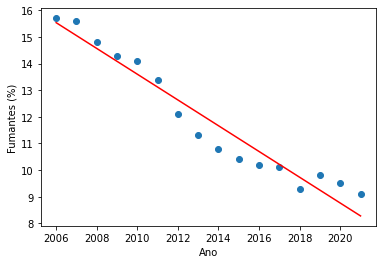

In [26]:
plt.scatter(ano, fumantes)
plt.xlabel('Ano')
plt.ylabel('Fumantes (%)')

plt.plot(ano, ano*theta1 + theta0, 'r')

## Método 3: Solução analítica

Considere a soma dos quadrados de todos os resíduos:

\begin{equation}
f = \sum\limits_{i=1}^N (y_i - \theta_0 - \theta_1 x_i)^2
\end{equation}

O método dos mínimos quadrados busca minimizar a soma dos quadrados dos resíduos:

\begin{equation}
min f(\theta_1, \theta_0)
\end{equation}

Uma forma de determinar analiticamente os valores que obedecem a este critério é derivar a função $f$ em relação à $\theta_0$ e $\theta_1$:

\begin{cases}
\dfrac{\partial f}{\partial \theta_0} =  \sum 2(y_i - \theta_0 - \theta_1 x_i )(-1) \\ \\
\dfrac{\partial f}{\partial \theta_1} =  \sum 2(y_i - \theta_0 - \theta_1 x_i )(-x_i) 
\end{cases}

Omitimos os limites da somatória para simplificar a notação.
Como queremos determinar o mínimo, a derivada deve ser igual a zero, ou seja:

\begin{cases}
0 =  \sum (y_i - \theta_0 - \theta_1 x_i) \\ \\
0 =  \sum (y_i - \theta_0 - \theta_1 x_i)(x_i) 
\end{cases}

Reorganizando os termos, chegamos à expressão:

\begin{cases}
\sum \theta_0 + \sum \theta_1 x_i =  \sum y_i  \\ \\
\sum \theta_0x_i + \sum \theta_1 x_i^2 =  \sum y_i x_i
\end{cases}

o qual pode ser simplificado em:

\begin{cases}
n \theta_0 + \theta_1\sum x_i =  \sum y_i  \\ \\
\theta_0 \sum x_i + \theta_1\sum x_i^2 =  \sum y_i x_i
\end{cases}

Neste ponto, observe que podemos resolver o sistema linear 2x2:

$\begin{bmatrix}
n & \sum x_i \\
\sum x_i & \sum x_i^2 
\end{bmatrix}
\begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix}
=
\begin{bmatrix} \sum y_i \\ \sum x_i y_i \end{bmatrix}
$

In [27]:
n = len(ano)
A = np.array([ [n, ano.sum() ], [ano.sum(), (ano**2).sum()] ])
b = np.array([ fumantes.sum(), (ano*fumantes).sum() ] )
res = np.linalg.solve(A,b)

print(res)
th0,th1 = res[0], res[1]
print(f'\nA equação do modelo é a reta: y = {th1:.3f}x + {th0:.3f}')
fumantes_em_2025 = res[1]*2025 + res[0]
print('A percentagem estimada de fumantes em 2025 é de', fumantes_em_2025)

[ 9.82827794e+02 -4.82205882e-01]

A equação do modelo é a reta: y = -0.482x + 982.828
A percentagem estimada de fumantes em 2025 é de 6.360882353014858


## Método analítico 2b:

No caso de uma matriz $2\times 2$ podemos determinar diretamente os valores das incógnitas

\begin{equation} \theta_1 = \dfrac{n\sum x_iy_i -\sum x_i\sum y_i}{n\sum x_i^2 - (\sum x_i)^2} \end{equation}

\begin{equation} \theta_0 = \overline{y} - \theta_1 \overline{x} \end{equation}

onde:

* $\overline{x}$ e $\overline{y}$ são as médias dos vetores $x$ e $y$ respectivamente.

In [28]:
n = len(ano)
X = ano
Y = fumantes
theta1 = (n*np.dot(X, Y) - X.sum() * Y.sum()) / ( n*np.square(X).sum() - X.sum()**2 )
theta0 = Y.mean() - theta1*X.mean()

print('theta1: ', theta1, 'theta0: ', theta0)
print(f'\nA equação do modelo é a reta: y = {theta1:.3f}x + {theta0:.3f}')

fumantes_em_2025 = theta1*2025 + theta0
print('A percentagem estimada de fumantes em 2025 é de', fumantes_em_2025)

theta1:  -0.4822058823529754 theta0:  982.8277941177159

A equação do modelo é a reta: y = -0.482x + 982.828
A percentagem estimada de fumantes em 2025 é de 6.360882352940735


## Método alternativo: Utilizando funções do python (statsmodels.api)

In [41]:
import statsmodels.api as sm

XX = sm.add_constant(X)
modelo = sm.OLS(Y, XX).fit()
print(modelo.summary())
th0, th1 = modelo.params
print(f'\nA equação do modelo é a reta: y = {th1:.3f}x + {th0:.3f}')

fumantes_em_2025 = modelo.predict([1, 2025])
print('A percentagem estimada de fumantes em 2025 é de', fumantes_em_2025)

                            OLS Regression Results                            
Dep. Variable:               fumantes   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     217.4
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           6.39e-10
Time:                        20:50:01   Log-Likelihood:                -13.543
No. Observations:                  16   AIC:                             31.09
Df Residuals:                      14   BIC:                             32.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        982.8278     65.854     14.924      0.0

d:\system\conda_envs\cn\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Exercício 1

Considerando os pontos abaixo:

\begin{array}{|c|cccccccccc|} \hline
x & 0 & 2 & 4 & 6 & 9 & 11 & 12 & 15 & 17 & 19 \\ \hline
y & 5 & 6 & 7 & 6 & 9 & 8 & 8 & 10 & 12 & 12 \\ \hline
\end{array}

1. Plote o gráfico de dispersão dos pontos acima.
2. Use o método dos mínimos quadrados linear para realizar o ajuste de uma reta.
3. Plote o gráfico da reta estimada.

# Exercício 2

Um resistor foi submetido à uma tensão elétrica $U$ e mediu-se a corrente $I$ que passou pelo circuito.
O valor de $U$ variou de 10V até 40V, conforme tabela abaixo.

\begin{array}{|c|c|} \hline
U (V)) & I (mA) \\ \hline
10,3 & 20,5 \\
15,8 & 31,8 \\
19,5 & 40,0 \\
22,6 & 44,6 \\
29,0 & 59,0 \\
37,4 & 75,1 \\
40,0 & 80,2 \\ \hline
\end{array}

1. Plote o gráfico de $U$ por $I$
2. Sabendo que o resistor obedece a lei de Ohm ($U = R\cdot I$), utilize o método dos mínimos quadrados para estimar um valor de $R$.